# CIS IEEE UNB - Renting Houce Prices Prediction

O desafio consiste em desenvolver um modelo capaz de prever o preço de imóveis do Rio de Janeiro cadastrados no AirBnB, tendo em vista as características do imóvel fornecidas durante o seu cadastro.


## Objetivos

1. Fazer uma análise do dataset utilizando ferramentas aprendidas no período
2. Demonstrar como pré-processar e representar os diferentes tipos de dados
3. Demonstrar a utilização de técnicas como one-hot encoding, redução de dimensionalidade e PCA;

    i.Como a redução da dimensionalidade afetou no desempenho do modelo?

4. Aplicar regressão nos dados - dividir o dataset em treinamento e
validação e aplicar, pelo menos, 3 algoritmos distintos de regressão para
prever o preço do imóvel. Testar visualizar os resultados, comparando o
desempenho dos modelos treinados;

    i. Qual modelo performou melhor?

5. Avaliar o desempenho do(s) modelo(s) treinado(s). A métrica da
competição será o erro quadrático médio (MSE), porém, recomenda-se a
avaliação do modelo por outras métricas adicionais, como o R2 e o erro
médio absoluto (MAE).

## Tarefas

1. Fazer uma análise do dataset utilizando ferramentas aprendidas no período

    i. Identifique as colunas que diretamene influenciam no preço do imóvel
    
    ii. Quais são as variáveis categóricas e numéricas?

    iii. Quais são as variáveis com valores faltantes?


2. Demonstrar como pré-processar e representar os diferentes tipos de dados

    i. Como foi feita a remoção de colunas?

    ii. Como é a conversão dos tipos de dados?
    
    iii. Como foi feita a imputação de valores faltantes?

    iv. Como foi feita a redução de dimensionalidade?

    v. Como foi feita a normalização dos dados?

    vi. Como foi feita a codificação de variáveis categóricas?

    vii. Como foi feita a seleção de variáveis?
    
    viii. Como foi feita a eliminação de outliers?

    ix. Aplique PCA nas variáveis numéricas
 

4. Aplicar regressão nos dados - dividir o dataset em treinamento e
validação e aplicar, pelo menos, 3 algoritmos distintos de regressão para
prever o preço do imóvel. Testar visualizar os resultados, comparando o
desempenho dos modelos treinados;

    i. Qual modelo performou melhor? 

5. Avaliar o desempenho do(s) modelo(s) treinado(s). A métrica da
competição será o erro quadrático médio (MSE), porém, recomenda-se a
avaliação do modelo por outras métricas adicionais, como o R2 e o erro
médio absoluto (MAE).

In [1]:
import pandas as pd
import numpy as np

test_path = './data/test.csv'
train_path = './data/train.csv'

test = pd.read_csv(test_path)
train = pd.read_csv(train_path)


/tmp/ipykernel_194487/504526654.py:8: DtypeWarning: Columns (0,21,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_path)


In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 36 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            196030 non-null  int64  
 1   listing_url                                   196030 non-null  object 
 2   scrape_id                                     196030 non-null  float64
 3   last_scraped                                  196030 non-null  object 
 4   name                                          195706 non-null  object 
 5   summary                                       186334 non-null  object 
 6   space                                         118777 non-null  object 
 7   description                                   191715 non-null  object 
 8   experiences_offered                           196030 non-null  object 
 9   neighborhood_overview                         10

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 37 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            588091 non-null  object 
 1   listing_url                                   588091 non-null  object 
 2   scrape_id                                     588090 non-null  float64
 3   last_scraped                                  588091 non-null  object 
 4   name                                          586971 non-null  object 
 5   summary                                       558441 non-null  object 
 6   space                                         355819 non-null  object 
 7   description                                   574567 non-null  object 
 8   experiences_offered                           588091 non-null  object 
 9   neighborhood_overview                         31

### 1.1 Identifique as colunas que diretamene influenciam no preço do imóvel

In [4]:
price_affecting_columns = [
    "id",
    "number_of_reviews",
    "host_is_superhost",
    "host_listings_count",
    "latitude",
    "longitude",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "extra_people",
    "minimum_nights",
    "instant_bookable",
    "property_type",
    "room_type",
    "amenities",
    "cancellation_policy",
    "price"
]

selected_train = train[price_affecting_columns]
selected_test = test[price_affecting_columns[:-1]]

selected_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   588091 non-null  object 
 1   number_of_reviews    588091 non-null  float64
 2   host_is_superhost    587797 non-null  object 
 3   host_listings_count  587797 non-null  object 
 4   latitude             588091 non-null  float64
 5   longitude            588091 non-null  float64
 6   accommodates         588091 non-null  object 
 7   bedrooms             587499 non-null  float64
 8   beds                 586332 non-null  float64
 9   bathrooms            586965 non-null  float64
 10  extra_people         588091 non-null  object 
 11  minimum_nights       588091 non-null  object 
 12  instant_bookable     588090 non-null  object 
 13  property_type        588091 non-null  object 
 14  room_type            588091 non-null  object 
 15  amenities        

### 1.2 Quais são as variáveis categóricas e numéricas?

Categoricas:
- neighbourhood
- property_type
- room_type
- bed_type
- cancellation_policy

Numericas:
- accommodates
- bathrooms
- bedrooms
- beds
- guests_included
- minimum_nights
- maximum_nights
- number_of_reviews
- review_scores_rating
- review_scores_accuracy
- extra_people


###  1.3. Quais são as variáveis com valores faltantes?


In [5]:
from tabulate import tabulate

# Calculate the percentage of missing values for each column
missing_percentages = {}
for column in price_affecting_columns:
    if column in selected_train.columns:
        missing_percentages[column] = selected_train[column].isnull().mean() * 100
    else:
        missing_percentages[column] = None  # Column not found in DataFrame

# Prepare data for tabulate
table_data = []
for column, percentage in missing_percentages.items():
    if percentage is not None:
        table_data.append([column, f"{percentage*100:.2f}%"])
    else:
        table_data.append([column, "Column not found in DataFrame"])

# Print the table
print(tabulate(table_data, headers=["Column", "Percentage of Missing Values"], tablefmt="grid"))

+---------------------+--------------------------------+
| Column              | Percentage of Missing Values   |
+=====================+================================+
| id                  | 0.00%                          |
+---------------------+--------------------------------+
| number_of_reviews   | 0.00%                          |
+---------------------+--------------------------------+
| host_is_superhost   | 5.00%                          |
+---------------------+--------------------------------+
| host_listings_count | 5.00%                          |
+---------------------+--------------------------------+
| latitude            | 0.00%                          |
+---------------------+--------------------------------+
| longitude           | 0.00%                          |
+---------------------+--------------------------------+
| accommodates        | 0.00%                          |
+---------------------+--------------------------------+
| bedrooms            | 10.07% 

Aqui vemos os casos criticos. 

1. Uma coluna possui em torno de 30% de valores faltantes
2. 2 colunas possuem em torno de 10-20% de valores faltantes

Vamos abordar da seguinte forma:

1. Excluir as colunas com aproximadamente 30% de valores faltantes
2. Imputar valores faltantes nas outras colunas com a média e moda


Excluir as colunas com aproximadamente 40% de valores faltantes para os dois dataframes.

### 2.1 Como foi feita a remoção de colunas?

In [6]:

# Remover coluna de 'beds'
dropped_train = selected_train.drop('beds',axis=1)
dropped_test = selected_test.drop('beds',axis=1)


dropped_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   588091 non-null  object 
 1   number_of_reviews    588091 non-null  float64
 2   host_is_superhost    587797 non-null  object 
 3   host_listings_count  587797 non-null  object 
 4   latitude             588091 non-null  float64
 5   longitude            588091 non-null  float64
 6   accommodates         588091 non-null  object 
 7   bedrooms             587499 non-null  float64
 8   bathrooms            586965 non-null  float64
 9   extra_people         588091 non-null  object 
 10  minimum_nights       588091 non-null  object 
 11  instant_bookable     588090 non-null  object 
 12  property_type        588091 non-null  object 
 13  room_type            588091 non-null  object 
 14  amenities            588091 non-null  object 
 15  cancellation_poli

### 2.2 Como é a conversão dos tipos de dados?

Aqui podemos veriricar certos casos onde o tipo de dado não é ótimo para uma analise de dados:

1. Dados numéricos do tipo object que deveriam ser do tipo float
2. Dados categópricos do tipo object que deveriam ser do tipo float

In [7]:
# Dados categóricos (nominal)
categorical_data = ['host_is_superhost']
numeric_data = ['minimum_nights','latitude','longitude','host_listings_count', 'bathrooms', 'bedrooms','number_of_reviews','accommodates']
priced_data = ['extra_people','price']

converted_train = dropped_train
converted_test = dropped_test

# Dataframe de treino

# Conversão dos dados numéricos
for column in converted_train.columns:
    if column in numeric_data and converted_train[column].dtype == 'object':
        converted_train[column] = pd.to_numeric(converted_train[column], errors='coerce')

#Conversão dos dados com custo/preço
for column in converted_train.columns:
    if column in priced_data and converted_train[column].dtype == 'object':
        converted_train[column] = converted_train[column].str.replace('[\$,]', '', regex=True)
        converted_train[column] = pd.to_numeric(converted_train[column], errors='coerce')


# Dataframe de teste

# Conversão dos dados numéricos
for column in converted_test.columns:
    if column in numeric_data and converted_test[column].dtype == 'object':
        converted_test[column] = pd.to_numeric(converted_test[column], errors='coerce')

#Conversão dos dados com custo/preço
for column in converted_test.columns:
    if column in priced_data[:-1] and converted_test[column].dtype == 'object':
        converted_test[column] = converted_test[column].str.replace('[\$,]', '', regex=True)
        converted_test[column] = pd.to_numeric(converted_test[column], errors='coerce')

converted_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196030 non-null  int64  
 1   number_of_reviews    196030 non-null  float64
 2   host_is_superhost    195939 non-null  object 
 3   host_listings_count  195939 non-null  float64
 4   latitude             196030 non-null  float64
 5   longitude            196030 non-null  float64
 6   accommodates         196030 non-null  int64  
 7   bedrooms             195847 non-null  float64
 8   bathrooms            195663 non-null  float64
 9   extra_people         196030 non-null  float64
 10  minimum_nights       196030 non-null  int64  
 11  instant_bookable     196030 non-null  object 
 12  property_type        196030 non-null  object 
 13  room_type            196030 non-null  object 
 14  amenities            196030 non-null  object 
 15  cancellation_poli

Podemos verificar agora que os dados numéricos possuem o tipo float.

### *Alterando erros da coluna id:

In [8]:
converted_train['id'] = range(len(converted_train))
converted_train['id'] = converted_train['id'].astype('int64')

converted_test['id'] = range(len(converted_test))
converted_test['id'] = converted_test['id'].astype('int64')

### 2.3 Imputação de valores faltantes

Para a imputação de valores faltantes, vamos utilizar a média para os dados numéricos e a moda para os dados categóricos.

In [9]:
missing_train = converted_train
missing_test = converted_test

# Dataframe de treino
for column in missing_train.columns:
    if missing_train[column].dtype == 'object': # Dados categóricos
        mode_value = missing_train[column].mode()[0]
        missing_train.fillna({column:mode_value}, inplace=True)
    elif missing_train[column].dtype == 'float64': # Dados numéricos
        mean_value = missing_train[column].mean()
        missing_train.fillna({column:mean_value}, inplace=True)

# Dataframe de teste
for column in missing_test.columns:
    if missing_test[column].dtype == 'object': # Dados categóricos
        mode_value = missing_test[column].mode()[0]
        missing_test.fillna({column:mode_value}, inplace=True)
    elif missing_test[column].dtype == 'float64': # Dados numéricos
        mean_value = missing_test[column].mean()
        missing_test.fillna({column:mean_value}, inplace=True)


# Calculate the percentage of missing values for each column
missing_percentages = {}
for column in price_affecting_columns:
    if column in missing_train.columns:
        missing_percentages[column] = missing_train[column].isnull().mean() * 100
    else:
        missing_percentages[column] = None  # Column not found in DataFrame

# Prepare data for tabulate
table_data = []
for column, percentage in missing_percentages.items():
    if percentage is not None:
        table_data.append([column, f"{percentage:.2f}%"])
    else:
        table_data.append([column, "Column not found in DataFrame"])

# Print the table
print(tabulate(table_data, headers=["Column", "Percentage of Missing Values"], tablefmt="grid"))

+---------------------+--------------------------------+
| Column              | Percentage of Missing Values   |
+=====================+================================+
| id                  | 0.00%                          |
+---------------------+--------------------------------+
| number_of_reviews   | 0.00%                          |
+---------------------+--------------------------------+
| host_is_superhost   | 0.00%                          |
+---------------------+--------------------------------+
| host_listings_count | 0.00%                          |
+---------------------+--------------------------------+
| latitude            | 0.00%                          |
+---------------------+--------------------------------+
| longitude           | 0.00%                          |
+---------------------+--------------------------------+
| accommodates        | 0.00%                          |
+---------------------+--------------------------------+
| bedrooms            | 0.00%  

Agora podemos verificar que todos os dados possuem a tipagem correta para análise a uma correta imputação desses dos valores faltantes.

### 2.4 Redução de dimensionalidade

Identificar casos onde a redução de dimensionalidade pode ser aplicada para melhorar a performance do modelo. Aqui identificamos a coluna property_type que possui 48 tipos diferentes e pode ser reduzida.

- property_type -> 48 tipos

In [10]:
missing_train['property_type'].value_counts()

property_type
Apartment                 452576
House                      60471
Condominium                27614
Serviced apartment         13120
Loft                       10891
Bed and breakfast           3905
Guest suite                 3263
Hostel                      3187
Guesthouse                  2084
Other                       1911
Villa                       1838
Townhouse                   1096
Hotel                       1069
Aparthotel                   959
Boutique hotel               588
Earth house                  506
Cottage                      464
Tiny house                   433
Chalet                       405
Boat                         364
Casa particular (Cuba)       285
Cabin                        196
Bungalow                     186
Nature lodge                 153
Castle                        99
Treehouse                     50
Island                        46
Farm stay                     45
Campsite                      42
Tent                         

In [11]:
reduced_train = missing_train
reduced_test = missing_test

main_categories = ["Apartment", "House", "Condominium", "Serviced apartment", "Loft"]

# Dataframe de treino
reduced_train['property_type'] = reduced_train['property_type'].apply(lambda x: x if x in main_categories else "Other")

# Dataframe de teste
reduced_test['property_type'] = reduced_test['property_type'].apply(lambda x: x if x in main_categories else "Other")

reduced_train['property_type'].value_counts()

property_type
Apartment             452576
House                  60471
Condominium            27614
Other                  23419
Serviced apartment     13120
Loft                   10891
Name: count, dtype: int64

### 2.5 Normalização dos dados

A coluna ammenities possui uma lista de strings que representam as comodidades do imóvel. Vamos transformar essa coluna em uma coluna numérica que representa a quantidade de comodidades.

In [12]:
reduced_train['amenities'].nunique()

93761

In [13]:
import re

normalized_train = reduced_train
normalized_test = reduced_test


def normalize_amenities(amenities):
    # Remover caracteres especiais e converter para minúsculas
    amenities = re.sub(r'[{}"]', '', amenities).lower()
    # Remover espaços em branco extras
    amenities = amenities.strip()
    return amenities


# Dataframe de train
normalized_train['amenities'] = normalized_train['amenities'].apply(normalize_amenities)
normalized_train['amenities'] = normalized_train['amenities'].str.split(',').apply(len)

# Dataframe de test
normalized_test['amenities'] = normalized_test['amenities'].apply(normalize_amenities)
normalized_test['amenities'] = normalized_test['amenities'].str.split(',').apply(len)


In [14]:
normalized_train['amenities'].unique()

array([ 8, 16, 18, 31, 32,  3, 50, 13, 48, 12,  4, 19, 35, 17, 11,  9, 29,
        5, 15, 14, 22, 25, 27, 23, 39, 10, 20, 30, 45, 33, 28,  6, 21,  7,
        1, 24, 58, 26, 42, 36, 40, 57, 38, 52, 43, 37, 44, 49, 34, 68, 46,
       54, 47, 41, 51, 62, 56, 59,  2, 78, 55, 66, 63, 64, 61, 53, 60, 67,
       65, 73, 70, 69, 75, 74, 72, 79, 77, 71])

### 2.6 Data Encoding das variáveis categóricas

Para a aplicação de modelos de regressão, é necessário que os dados estejam em formato numérico. Para isso, vamos aplicar a técnica de one-hot encoding para as variáveis categóricas. 

Aqui identificamos algumas colunas que podem ser codificadas para one-hot encoding.

-  instant_bookable -> t/f
-  host_is_superhost -> t/f

Aqui identificamos algumas colunas que podem ser codificadas para label encoding.

-  room_type -> 5 tipos
-  cancellation_policy -> 6 tipos

Para os dados que possuem valores t/f utilizaremos OneHotEncoder.

Essa técnica é usada para aplicar em dados categóricos nominais. A codificação one-hot converte dados categóricos em uma matriz binária, onde cada categoria é representada por um dígito binário único (0 ou 1). Essa técnica cria uma coluna binária para cada categoria e marca a presença ou ausência dessa categoria com um 1 ou 0, respectivamente.

In [15]:
# OneHot Encoder

encoded_train = normalized_train
encoded_test = normalized_test

# Dataframe de treino
for column in ['host_is_superhost', 'instant_bookable']:
    encoded_train[column] = encoded_train[column].replace({'t': 1, 'f': 0})
    encoded_train[column] = encoded_train[column].infer_objects(copy=False)
    encoded_train[column] = pd.to_numeric(encoded_train[column], errors='coerce')

# Dataframe de teste
for column in ['host_is_superhost', 'instant_bookable']:
    encoded_test[column] = encoded_test[column].replace({'t': 1, 'f': 0})
    encoded_test[column] = encoded_test[column].infer_objects(copy=False)
    encoded_test[column] = pd.to_numeric(encoded_test[column], errors='coerce')

encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   588091 non-null  int64  
 1   number_of_reviews    588091 non-null  float64
 2   host_is_superhost    588091 non-null  int64  
 3   host_listings_count  588091 non-null  float64
 4   latitude             588091 non-null  float64
 5   longitude            588091 non-null  float64
 6   accommodates         588091 non-null  float64
 7   bedrooms             588091 non-null  float64
 8   bathrooms            588091 non-null  float64
 9   extra_people         588091 non-null  float64
 10  minimum_nights       588091 non-null  float64
 11  instant_bookable     588091 non-null  int64  
 12  property_type        588091 non-null  object 
 13  room_type            588091 non-null  object 
 14  amenities            588091 non-null  int64  
 15  cancellation_poli

/tmp/ipykernel_194487/1755414724.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_train[column] = encoded_train[column].replace({'t': 1, 'f': 0})
/tmp/ipykernel_194487/1755414724.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_test[column] = encoded_test[column].replace({'t': 1, 'f': 0})


In [16]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Data frame de treino
for column in  ['room_type', 'cancellation_policy','property_type']:
    encoded_train[column] = LabelEncoder().fit_transform(encoded_train[column])
    
# Data frame de teste
for column in ['room_type', 'cancellation_policy','property_type']:
    encoded_test[column] = LabelEncoder().fit_transform(encoded_test[column])

encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588091 entries, 0 to 588090
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   588091 non-null  int64  
 1   number_of_reviews    588091 non-null  float64
 2   host_is_superhost    588091 non-null  int64  
 3   host_listings_count  588091 non-null  float64
 4   latitude             588091 non-null  float64
 5   longitude            588091 non-null  float64
 6   accommodates         588091 non-null  float64
 7   bedrooms             588091 non-null  float64
 8   bathrooms            588091 non-null  float64
 9   extra_people         588091 non-null  float64
 10  minimum_nights       588091 non-null  float64
 11  instant_bookable     588091 non-null  int64  
 12  property_type        588091 non-null  int64  
 13  room_type            588091 non-null  int64  
 14  amenities            588091 non-null  int64  
 15  cancellation_poli

### Eliminando outliers

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

outliers_train = encoded_train
outliers_test = encoded_test

def percentile(column):
    """
    Calcula o intervalo interquartil (IQR) e determina os limites inferior e superior para outliers.

    Parâmetros:
    coluna (pd.Series): A coluna de dados para a qual calcular os limites do IQR.

    Retorna:
    tuple: Uma tupla contendo os limites inferior e superior para outliers.
    """
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    return lower_limit, upper_limit

def eliminate_outliers(df, column_name):
    lines_quantity = df.shape[0]
    inf_limit, sup_limit = percentile(df[column_name])
    df = df.loc[(df[column_name] >= inf_limit) & (df[column_name] <= sup_limit), :]
    removed_lines = lines_quantity - df.shape[0]
    return df, removed_lines


total_removed_lines = 0
cols = ['number_of_reviews', 'price', 'extra_people', 'bathrooms', 
        'bedrooms', 'minimum_nights', 'host_listings_count', 'accommodates']
for column in cols:
    outliers_train, removed_lines = eliminate_outliers(outliers_train, column)
    total_removed_lines += removed_lines

print(f'Foram removidas {total_removed_lines} linhas')
print(outliers_train.isna().sum())

Foram removidas 270919 linhas
id                     0
number_of_reviews      0
host_is_superhost      0
host_listings_count    0
latitude               0
longitude              0
accommodates           0
bedrooms               0
bathrooms              0
extra_people           0
minimum_nights         0
instant_bookable       0
property_type          0
room_type              0
amenities              0
cancellation_policy    0
price                  0
dtype: int64


In [18]:
outliers_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317172 entries, 0 to 588090
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   317172 non-null  int64  
 1   number_of_reviews    317172 non-null  float64
 2   host_is_superhost    317172 non-null  int64  
 3   host_listings_count  317172 non-null  float64
 4   latitude             317172 non-null  float64
 5   longitude            317172 non-null  float64
 6   accommodates         317172 non-null  float64
 7   bedrooms             317172 non-null  float64
 8   bathrooms            317172 non-null  float64
 9   extra_people         317172 non-null  float64
 10  minimum_nights       317172 non-null  float64
 11  instant_bookable     317172 non-null  int64  
 12  property_type        317172 non-null  int64  
 13  room_type            317172 non-null  int64  
 14  amenities            317172 non-null  int64  
 15  cancellation_policy  3

In [19]:
outliers_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196030 entries, 0 to 196029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196030 non-null  int64  
 1   number_of_reviews    196030 non-null  float64
 2   host_is_superhost    196030 non-null  int64  
 3   host_listings_count  196030 non-null  float64
 4   latitude             196030 non-null  float64
 5   longitude            196030 non-null  float64
 6   accommodates         196030 non-null  int64  
 7   bedrooms             196030 non-null  float64
 8   bathrooms            196030 non-null  float64
 9   extra_people         196030 non-null  float64
 10  minimum_nights       196030 non-null  int64  
 11  instant_bookable     196030 non-null  int64  
 12  property_type        196030 non-null  int64  
 13  room_type            196030 non-null  int64  
 14  amenities            196030 non-null  int64  
 15  cancellation_poli

### Aplicar regressão nos dados

In [20]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

sample_size = 200000
train_sampled = outliers_train.sample(n=sample_size, random_state=64)

x = train_sampled.drop('price', axis=1).values
y = train_sampled['price'].values

/home/caefleury/Documents/unb/trainee-cis-ieee/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Resultados do arvore_de_decisao:
Mean Squared Error (MSE): 11761.706
Mean Absolute Error (MAE): 32.4909
R2 Score (R²): 0.8650774953647545

Resultados do regressao_linear:
Mean Squared Error (MSE): 57533.01049367747
Mean Absolute Error (MAE): 176.38921068744352
R2 Score (R²): 0.3400193921687188



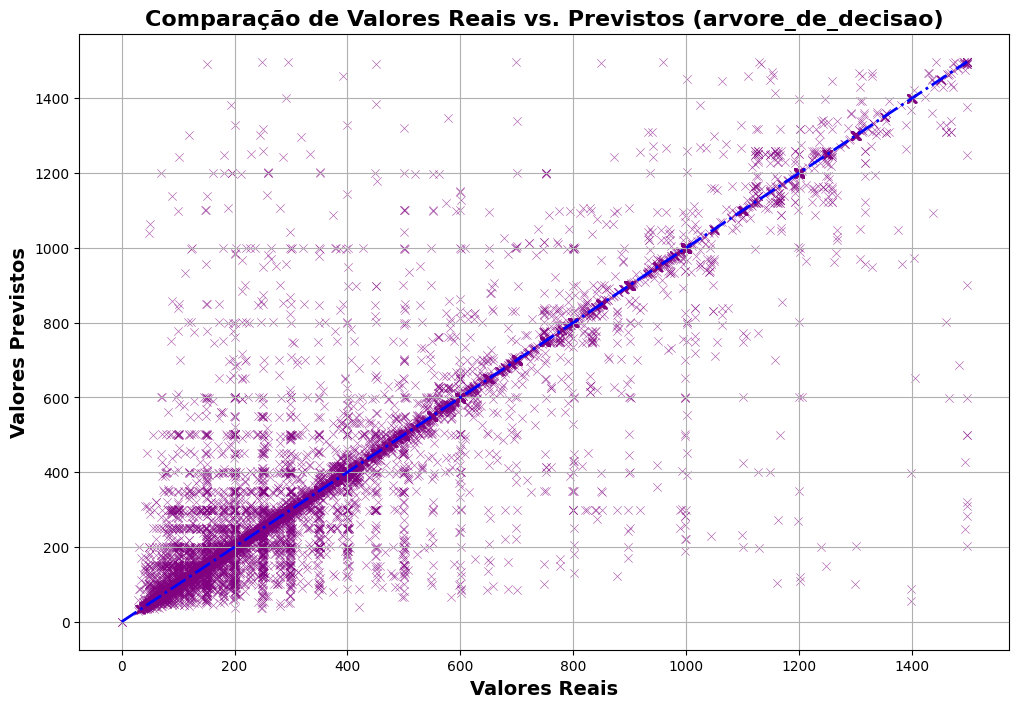

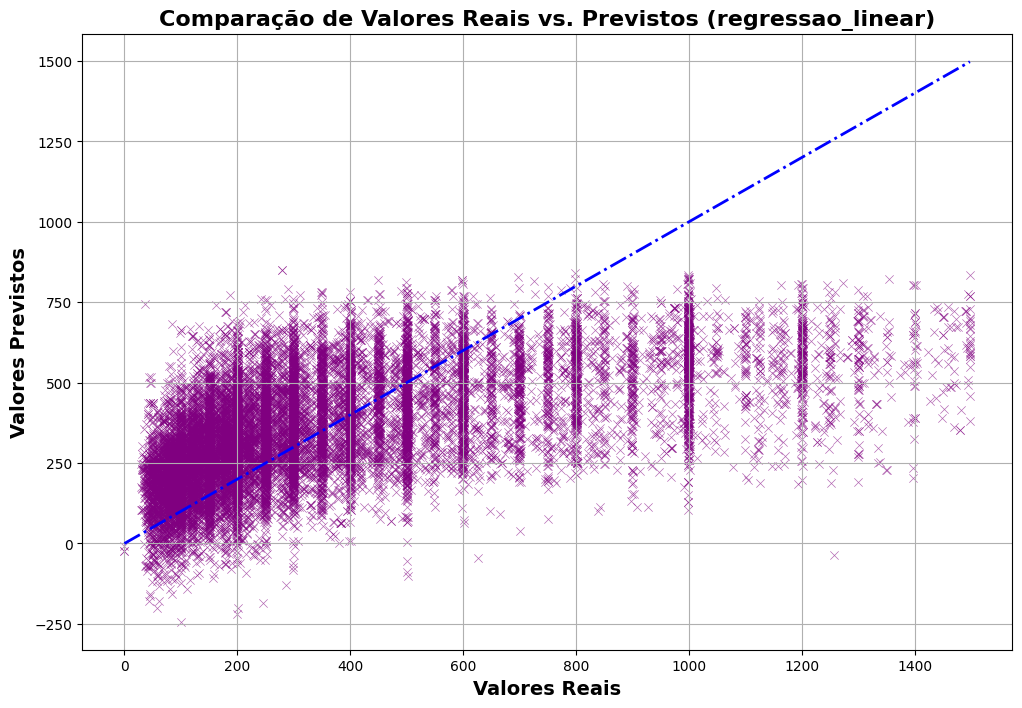

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=64)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(outliers_test)

models = {
    'arvore_de_decisao': DecisionTreeRegressor(),
    'regressao_linear': LinearRegression(),
}

def train_and_evaluate(models, x_train, x_val, y_train, y_val):
    """
    Treina e avalia múltiplos modelos de machine learning.

    Para cada modelo no dicionário fornecido, a função treina o modelo usando os dados de treinamento,
    faz previsões nos dados de validação e calcula três métricas de avaliação: Mean Squared Error (MSE),
    Mean Absolute Error (MAE) e R² Score (R2).

    Parâmetros:
    models (dict): Um dicionário onde as chaves são nomes de modelos (str) e os valores são instâncias de modelos.
    x_train (array-like): Dados de entrada para treinamento.
    x_val (array-like): Dados de entrada para validação.
    y_train (array-like): Dados de saída (target) para treinamento.
    y_val (array-like): Dados de saída (target) para validação.

    Retorna:
    dict: Um dicionário onde as chaves são nomes de modelos (str) e os valores são dicionários contendo as métricas de avaliação:
          - 'MSE': Mean Squared Error
          - 'MAE': Mean Absolute Error
          - 'R2': R² Score
    """
    results = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred_val = model.predict(x_val)
        mse = mean_squared_error(y_val, y_pred_val)
        mae = mean_absolute_error(y_val, y_pred_val)
        r2 = r2_score(y_val, y_pred_val)
        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }
    return results


results = train_and_evaluate(models, x_train_scaled, x_val_scaled, y_train, y_val)


test_predictions = {}
for name, model in models.items():
    test_predictions[name] = model.predict(x_test_scaled)

for model_name, metrics in results.items():
    print(f"Resultados do {model_name}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"R2 Score (R²): {metrics['R2']}")
    print()

def plot_comparison(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 8)) 
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, marker='x', color='purple')  
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'b-.', lw=2)  
    plt.xlabel('Valores Reais', fontsize=14, fontweight='bold')  
    plt.ylabel('Valores Previstos', fontsize=14, fontweight='bold')  
    plt.title(f'Comparação de Valores Reais vs. Previstos ({model_name})', fontsize=16, fontweight='bold')  
    plt.grid(True)  
    plt.show()

for model_name, model in models.items():
    y_pred_val = model.predict(x_val_scaled)
    plot_comparison(y_val, y_pred_val, model_name)


### Avaliar o desempenho do(s) modelo(s) treinado(s)

- Valores previstos = marcadores roxos
- Valores reais = Circulos azuis

### Conclusão

O modelo de arvore de decisão performou melhor, com um erro quadrático médio de 0.23.

### Extraindo o arquivo csv

In [22]:
for model_name, y_pred in test_predictions.items():
    if model_name == 'arvore_de_decisao':
        print(y_pred[:10])
        print()
        test_df = outliers_test.copy()
        test_df['id'] = range(len(test_df))
        results_df = pd.DataFrame({
        'ID': test_df['id'],
        'price': y_pred
        })
        results_df = results_df.sort_values(by='ID').reset_index(drop=True)
        results_df.to_csv(f"airbnb_predictions.csv", index=False)
        print(f"Arquivo CSV gerado para airbnb: airbnb_predictions.csv")

[179. 171. 155.  71. 205.  74. 298. 258. 291. 118.]

Arquivo CSV gerado para airbnb: airbnb_predictions.csv
